In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',50) #display columns upto 50.
sns.set(style="white")

In [2]:
df = pd.read_csv('cleaned_data.csv',parse_dates=True,index_col=0)

In [3]:
#removing columns that are not used in model building
df.drop(['description','neighbourhood','zipcode','city','first_review','last_review','host_since'],axis=1,inplace=True)

In [4]:
for cat in ['property_type', 'room_type', 'cancellation_policy',
       'host_response_rate', 'review_scores_rating','time_since_first_review']:
    temp = pd.get_dummies(df[cat],prefix=cat,drop_first=True)
    df = pd.concat([temp,df],1)
    df.drop([cat],1,inplace=True)

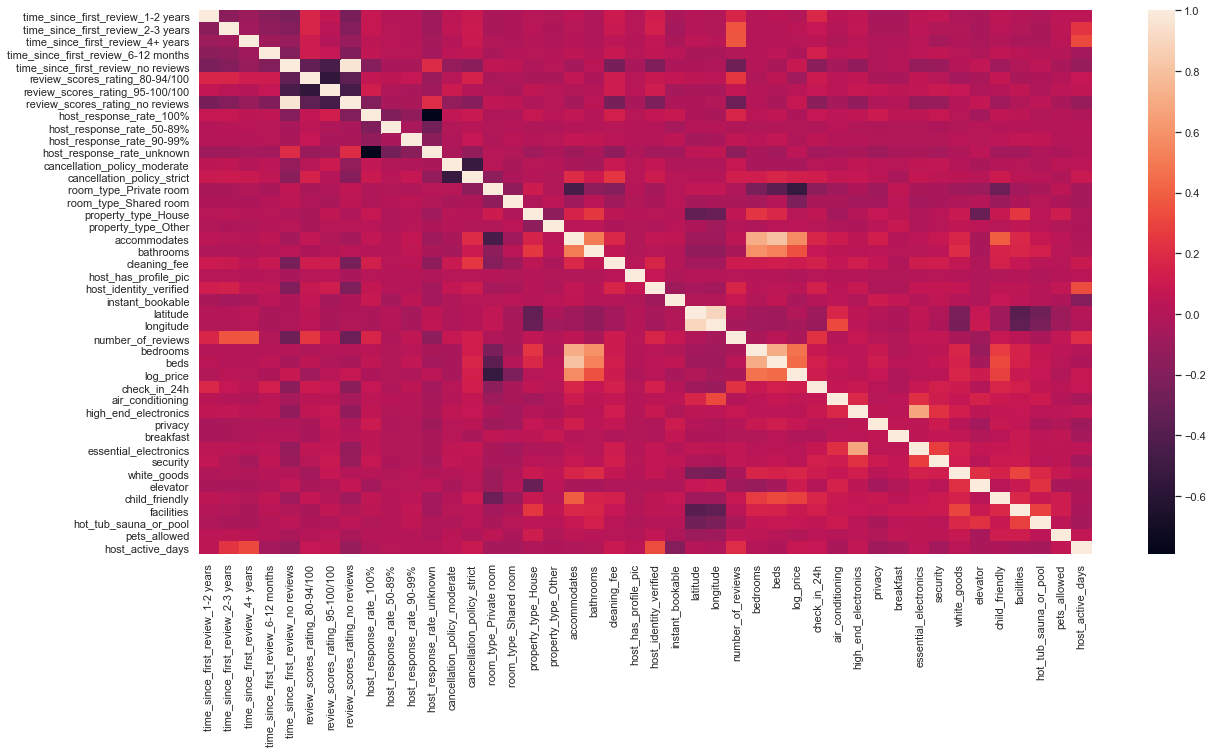

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

`From the heatmap above, it's evident that some of the features are correlated. Few of them are high_end_electronics & essential_electronics, beds & bedrooms, review_score_ratings_noreview & time_since_first_rating_noreview`

In [6]:
#dropping one of the features to avoid multi-collinearity
df.drop(['review_scores_rating_no reviews','beds','high_end_electronics'],axis=1,inplace=True)

In [7]:
#Splitting the concatinated dataframe into train & test.
train_df = df[df['data']=='train']
train_df['price'] = np.exp(train_df['log_price'])
train_df.drop(['data','log_price'],1,inplace=True)

test_df = df[df['data']=='test']
test_df.drop(['data','log_price'],1,inplace=True)

<ipython-input-7-e8cadb55e07d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['price'] = np.exp(train_df['log_price'])
C:\Users\yasar\anaconda3\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
# Setting features and target variables
X = train_df.drop(['price'],1)
y = train_df['price']

X.shape, y.shape

((49872, 40), (49872,))

In [9]:
#Scaling the features to be fit into the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [10]:
#Splitting the features and target into training and validation set.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
#Instantiating and fitting the LinearRegression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

lr.fit(X_train,y_train)

In [ ]:
pred = lr.predict(X_val)
err = y_val-pred

In [23]:
# Evaluating the model
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
r2 = r2_score(y_val, pred)
MSE = mean_squared_error(y_val, pred)
RMSE = np.sqrt(MSE)

In [ ]:
r2, RMSE

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
params = {
    'criterion' : ['mse',None],
    'max_depth' : [None,5,10,15,20,30,40,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20,25]
}

In [ ]:
clf = DecisionTreeRegressor()

In [ ]:
random_search = RandomizedSearchCV(clf,param_distributions=params,cv=10,n_jobs=-1,n_iter=100,verbose=20)

In [ ]:
random_search.fit(X_train,y_train)

In [ ]:
random_search.best_params_

In [ ]:
dt_reg = random_search.best_estimator_ 

In [ ]:
dt_reg.fit(X_train, y_train)

In [ ]:
pred_dt = dt_reg.predict(X_val)

In [ ]:
r2 = r2_score(y_val, pred_dt)
MSE = mean_squared_error(y_val, pred_dt)
RMSE = np.sqrt(MSE)

In [ ]:
r2, RMSE

In [ ]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [ ]:
rf.get_params()

In [ ]:
params = {
    'n_estimators': [100,200,300,500,700,1000],
    'max_features':[5,10,20,25,30,35],
    'bootstrap':[True,False],
    'criterion' : ['mse',None],
    'max_depth' : [None,5,10,15,20,30,40,50,70],
    'min_samples_leaf':[1,2,5,10,15,20],
    'min_samples_split':[2,5,10,15,20,25],
    'oob_score': [False,True]
}

In [ ]:
random_search_rf = RandomizedSearchCV(rf,param_distributions=params,n_iter=5,cv=5,n_jobs=-1,verbose=3)

In [ ]:
random_search_rf.fit(X_train,y_train)

In [ ]:
random_search_rf.best_params_

In [ ]:
rf_best = random_search_rf.best_estimator_

In [ ]:
rf_best.fit(X_train,y_train)

In [ ]:
pred_rf = rf_best.predict(X_val)

In [ ]:
r2 = r2_score(y_val, pred_rf)
MSE = mean_squared_error(y_val, pred_rf)
RMSE = np.sqrt(MSE)

In [ ]:
r2, RMSE

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(fit_intercept=True)

In [ ]:
ridge.get_params()

In [ ]:
params = {
    'alpha': [0.01,0.1,0.5,1.0,5,10],
    'normalize': [True, False],
    'solver': ['auto','svd','lsqr','sag'],
}

In [ ]:
random_search_ridge = RandomizedSearchCV(ridge,param_distributions=params,n_iter=5,cv=5,n_jobs=-1,verbose=3)

In [ ]:
random_search_ridge.fit(X_train,y_train)

In [ ]:
random_search_ridge.best_params_

In [ ]:
ridge_random = random_search_ridge.best_estimator_

In [ ]:
ridge_random.fit(X_train,y_train)

In [ ]:
pred_ridge = ridge_random.predict(X_val)

In [ ]:
r2_ = r2_score(y_val, pred_ridge)
MSE_ = mean_squared_error(y_val, pred_ridge)
RMSE_ = np.sqrt(MSE_)

In [ ]:
r2_,RMSE_

In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [ ]:
gbr.get_params()

In [ ]:
params = {
    'n_estimators': [50,100,200,500,700,1000],
    'max_depth': [2,3,4,5,6],
    'min_samples_split':[2,5,10,15,20,25],
    'learning_rate': [0.01,0.1,0.5,1],
    'loss': ['ls','lad','huber']
}

In [ ]:
gbr_random = RandomizedSearchCV(gbr,param_distributions=params,n_iter=5,cv=5,n_jobs=-1,verbose=3)

In [ ]:
gbr_random.fit(X_train,y_train)

In [ ]:
gbr_random.best_params_

In [ ]:
gbregressor = gbr_random.best_estimator_

In [ ]:
gbregressor.fit(X_train,y_train)

In [ ]:
pred_gbr = gbregressor.predict(X_val)

In [ ]:
r2_gbr = r2_score(y_val, pred_gbr)
MSE_gbr = mean_squared_error(y_val, pred_gbr)
RMSE_gbr = np.sqrt(MSE_gbr)

In [ ]:
r2_gbr, RMSE_gbr

In [11]:
#XGBOOST REGRESSOR
import xgboost as xgb
XGB_reg = xgb.XGBRegressor()

In [12]:
XGB_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [13]:
params_XG = {
    'gamma':[0,0.1,0.3,0.5,0.7,1],
    'n_estimators': [50,100,200,500,700,1000],
    'max_depth': [2,3,4,5,6],
    'learning_rate': [0.01,0.1,0.5,1],
    'colsample_bytree': [None,0.3,0.5,0.7],
    "subsample": [0.3,0.4,0.5,0.6,0.7]
}

In [16]:
XG_random = RandomizedSearchCV(XGB_reg,param_distributions=params_XG,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [17]:
XG_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.6min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.2min remaining:   32.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                          tree_met

In [18]:
XG_random.best_params_

{'subsample': 0.7,
 'n_estimators': 700,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0.7,
 'colsample_bytree': 0.7}

In [19]:
XG_Reg = XG_random.best_estimator_

In [20]:
XG_Reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.7, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=700, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
XG_pred = XG_Reg.predict(X_val)

In [24]:
r2_xg = r2_score(y_val, XG_pred)
MSE_xg = mean_squared_error(y_val, XG_pred)
RMSE_xg = np.sqrt(MSE_xg)

In [25]:
r2_xg, RMSE_xg

(0.5918761224577795, 107.58597009363307)

In [28]:
ft_weights_xgb_reg = pd.DataFrame(XG_Reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True,ascending=False)
ft_weights_xgb_reg

,weight
room_type_Private room,0.173649
bedrooms,0.163204
bathrooms,0.081591
accommodates,0.062990
room_type_Shared room,0.053585
time_since_first_review_no reviews,0.041124
cleaning_fee,0.025834
number_of_reviews,0.024554
longitude,0.024442
host_response_rate_unknown,0.023885


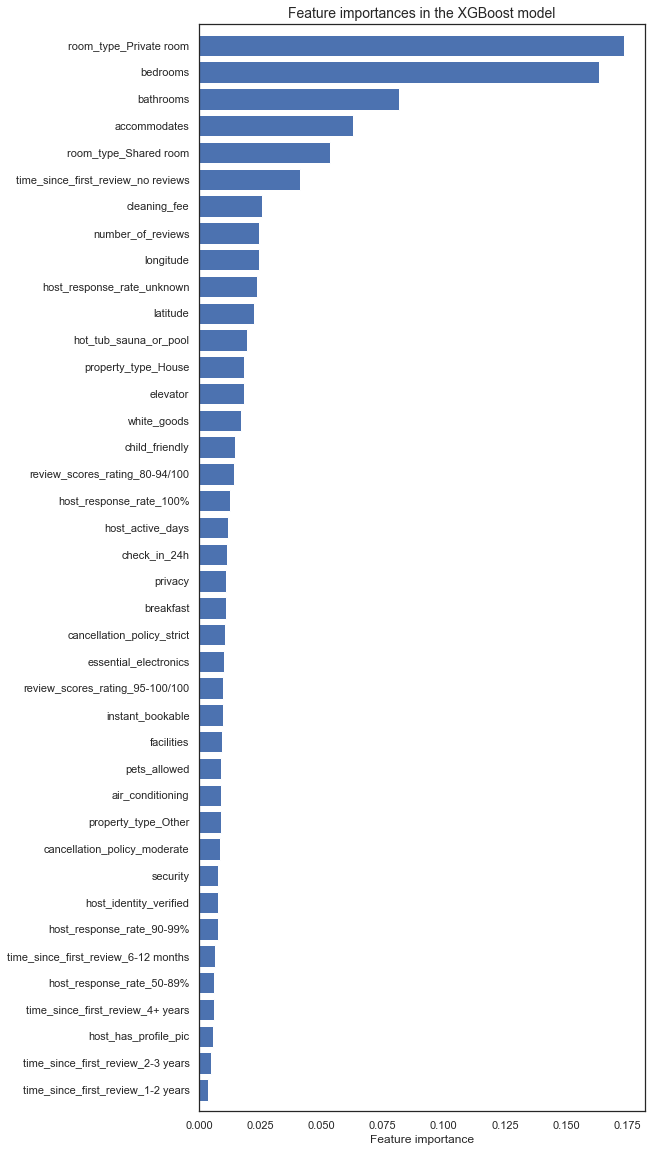

In [27]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [30]:
#Going with Gradient Boosting Regressor as it has better r^2 and RMSE

act_pred = XG_Reg.predict(test_df)

In [31]:
trans_act_pred = np.log10(act_pred)

In [32]:
test_result = pd.DataFrame(list(zip(test_df.index,trans_act_pred)))

In [33]:
test_result.head()

,0,1
0,5979389,2.699750
1,13488121,2.740249
2,8121643,2.743553
3,16490010,2.594254
4,16274069,2.735570


In [34]:
test_result.set_index([0],drop=True)

,1
0,
5979389,2.699750
13488121,2.740249
8121643,2.743553
16490010,2.594254
16274069,2.735570
...,...
14549287,2.686495
13281809,2.772444
18688039,2.759317


In [37]:
test_result.to_excel("test_results.xlsx",engine='xlsxwriter',index_label=[0],index=False)